In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = pd.read_csv("../data/features.csv")
y = pd.read_csv("../data/target.csv").squeeze()

# Drop leakage if exists
if "days_since_last_purchase" in X.columns:
    X = X.drop(columns=["days_since_last_purchase"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [2]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

results = []

def add_result(model_name, accuracy, f1, roc_auc):
    results.append({
        "model": model_name,
        "accuracy": accuracy,
        "f1_score": f1,
        "roc_auc": roc_auc
    })
    print(f"✅ Added results for: {model_name}")

**Decision Tree**

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

add_result("Decision Tree", acc, f1, roc)

✅ Added results for: Decision Tree


**Logistic Regression**

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(
    penalty="l2",
    C=1.0,
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

add_result("Logistic Regression", acc, f1, roc)

✅ Added results for: Logistic Regression


**Random Forest**

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    max_features='sqrt',
    random_state=42
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

add_result("Random Forest", acc, f1, roc)

✅ Added results for: Random Forest


**XGB**

In [6]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

xgb_D = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)
xgb_D.fit(X_train, y_train)

y_pred = xgb_D.predict(X_test)
y_prob = xgb_D.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

add_result("XGBoost", acc, f1, roc)

✅ Added results for: XGBoost


**MLP**

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50, 25),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)
y_prob = mlp.predict_proba(X_test_scaled)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

add_result("MLP", acc, f1, roc)

✅ Added results for: MLP


**Result Comparison**

,model,accuracy,f1_score,roc_auc
0,Decision Tree,0.904167,0.862275,0.893315
1,Logistic Regression,0.941667,0.917647,0.963828
2,Random Forest,0.958333,0.942529,0.966804
3,XGBoost,0.950000,0.931818,0.961996
4,MLP,0.929167,0.901734,0.961767


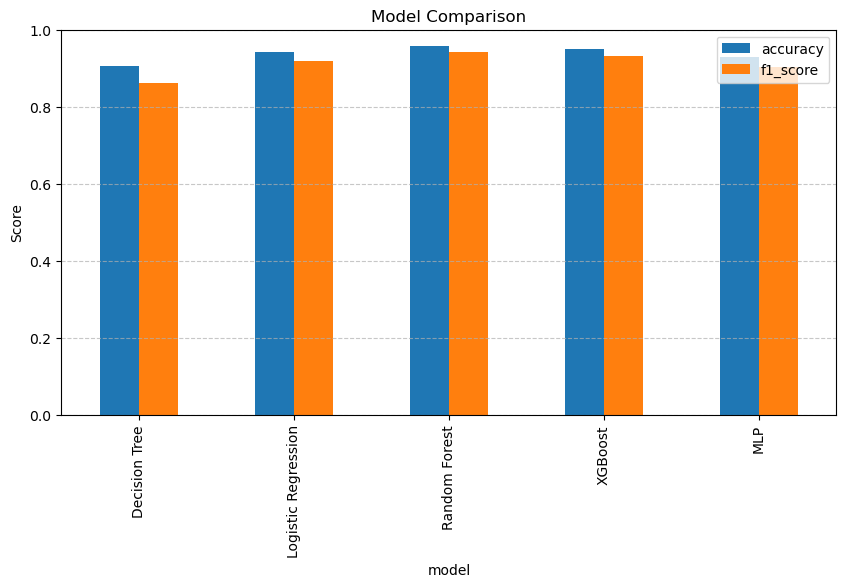

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

results_df = pd.DataFrame(results)
display(results_df)

# Plot Accuracy & F1
results_df.set_index("model")[["accuracy", "f1_score"]].plot(kind="bar", figsize=(10,5))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Summary**

We tested 5 models on the same train/test split. Random Forest got the best accuracy (0.96). All models performed better than random guessing, which means our features are useful.

- Decision Tree: simple baseline, easy to interpret
- Logistic Regression: good linear model
- Random Forest: best overall
- XGBoost: close second
- MLP: works but needs more tuning

**Optional: LLM Insights**

The cells below use a Hugging Face model to generate business insights. Skip if you don't have the token set up.

In [9]:
import os

HUGGINGFACE_TOKEN = os.environ.get("HUGGINGFACE_TOKEN")
RUN_LLM = bool(HUGGINGFACE_TOKEN)

if not RUN_LLM:
    print("ℹ️ HUGGINGFACE_TOKEN is not set. Skipping optional LLM insights section.")

ℹ️ HUGGINGFACE_TOKEN is not set. Skipping optional LLM insights section.


In [10]:
if RUN_LLM:
    try:
        import torch
        from huggingface_hub import login
        from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

        model_name = "mistralai/Mistral-7B-Instruct-v0.1"

        login(token=HUGGINGFACE_TOKEN)

        quant_config = BitsAndBytesConfig(load_in_4bit=True)
        tokenizer = AutoTokenizer.from_pretrained(model_name, token=HUGGINGFACE_TOKEN)
        model = AutoModelForCausalLM.from_pretrained(
            model_name,
            quantization_config=quant_config,
            token=HUGGINGFACE_TOKEN,
        )

        device = "cuda" if torch.cuda.is_available() else "cpu"
        model.to(device)
        print(f"✅ Loaded LLM on device: {device}")

    except Exception as e:
        RUN_LLM = False
        print(f"⚠️ Failed to load LLM dependencies/model. Skipping LLM insights. Error: {e}")

In [11]:
if RUN_LLM:
    results_df_sorted = results_df.sort_values(by="accuracy", ascending=False)
    model_results_text = ""
    for _, row in results_df_sorted.iterrows():
        model_results_text += (
            f"- {row['model']}: Accuracy = {row['accuracy']:.2f}, "
            f"F1-score = {row['f1_score']:.2f}, ROC-AUC = {row['roc_auc']:.2f}\n"
        )

    print("✅ Generated model results text for LLM:")
    print(model_results_text)

    top_features = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(3)
    print("✅ Top 3 features from Random Forest:", top_features.to_dict())

    feature_summary = X.describe().transpose()
    feature_summary_text = feature_summary.to_string()

    top_features_text = f"Top 3 features from Random Forest: {top_features.to_dict()}"

    llm_prompt = f"""
Business Context:
We have a retail customer dataset with {X.shape[0]} rows and {X.shape[1]} features.
Here is a summary of the features:
{feature_summary_text}

Based on the following machine learning model evaluation results and top features:

Machine Learning Model Evaluation Results:
{model_results_text}

Top Features:
{top_features_text}

Please:
1. Summarise overall model performance trends
2. Compare the models and highlight strengths and weaknesses
3. Explain why certain models perform better than others
4. Identify top features contributing to model performance
5. Actionable business insights and recommendations in the style of a realistic business scenario for customer retention and marketing. For each insight, specify:
   - Which feature(s) it relates to
   - The type of customers it affects (e.g., high spenders, high-risk)
   - A concrete action that the business could take

Make sure the output is structured, clear, and practical for business decision-making.
"""

In [12]:
if RUN_LLM:
    tokenizer.pad_token = tokenizer.eos_token

    inputs = tokenizer(
        llm_prompt,
        return_tensors="pt",
        truncation=True,
        padding=True,
    ).to(device)

    outputs = model.generate(
        **inputs,
        max_new_tokens=800,
        eos_token_id=tokenizer.eos_token_id,
        do_sample=False,
    )

    response = tokenizer.decode(outputs[0], skip_special_tokens=True)

In [13]:
if RUN_LLM:
    print("LLM Output:\n")
    print(response)

**Recommendation**

Use Random Forest for this dataset - it has the best accuracy and is stable.